# Introdução a Mineração de textos com Python

    1. Objetivos:
      -- Ob1. O objetivo do Prjeto é criar uma núvem de palavras extraidas de uma reportagem da internet.

    2. Etapas do Desenvolvimento
      -- ED1. Abertura do arquivo
      -- ED2. Tokenização.
      -- ED3. Remoção das Stopwords.
      -- ED4. Verificando as palavras com mais frequência.
      -- ED5. Gerando a wordcloud

Fonte: https://www.ufsm.br/pet/sistemas-de-informacao/2021/07/12/introducao-a-mineracao-de-textos-com-python/  
Análise de Sentimento: https://medium.com/@alegeorgelustosa/análise-de-sentimentos-em-python-2a7d04a836e0

In [1]:
# CASO NECESSITE DE ALGO DA BIBLIOTECA NLTK PARA NLP USE ESSE COMANDO E INSTALE
# import nltk

# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()

# 01. Importando as Librarys

In [2]:
# Importação das bibliotecas
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
import string
import re

In [3]:
import os
from pathlib import Path
diretorio = Path(os.getcwd())

for arquivo in os.walk(diretorio):
    print(f'{arquivo[2]} \n')

['Untitled.ipynb', 'TextMiningWithPython.ipynb', 'BagOfWordsPython.ipynb', '.log', 'texto_valor.rtf', 'texto_valor.txt', 'wordCloud.png'] 

['TextMiningWithPython-checkpoint.ipynb', 'Untitled-checkpoint.ipynb'] 



In [4]:
# Abertura e leitura do do arquivo
texto_valor = open('texto_valor.txt', mode = 'r').read()
# Texto em minusculo
texto_valor = texto_valor.lower()
# Removendo pontuação do texto com regex
texto_valor = re.sub(r'[^\w\s]','',texto_valor)
print(texto_valor)

por que dedicação e lealdade valem pouco na hora de ser promovido


o colunista claudio garcia compara a relação das empresas com seus empregados à forma como as operadoras de telefonia tratam seus clientes

acho que todo mundo já viveu isso trocar o aparelho celular é praticamente um atestado de quanto não somos importantes para a companhia de telefonia da qual somos clientes usualmente mudar para um concorrente é a melhor opção eles vão dar mais descontos no aparelho e no plano você ainda pode ter uma chance de ficar na sua operadora se voltar e mostrar que tem uma oferta melhor talvez possam cobrila o mais revoltante é descobrir que você passou anos pagando mais caro do que todo mundo e o pior se você não tomar alguma ação ninguém vem falar com você ou seja lealdade é bonito de falar mas vale muito pouco de certa forma essa sensação é semelhante para profissionais em muitas o organizações

anos de dedicação e conhecimento da empresa aparentemente pouco valem quando oportunidades de 

In [5]:
# pip install unidecode

In [6]:
# Remover acentuação
from unidecode import unidecode

text_valor_sem_acentuacao = unidecode(texto_valor)
print(text_valor_sem_acentuacao)

por que dedicacao e lealdade valem pouco na hora de ser promovido


o colunista claudio garcia compara a relacao das empresas com seus empregados a forma como as operadoras de telefonia tratam seus clientes

acho que todo mundo ja viveu isso trocar o aparelho celular e praticamente um atestado de quanto nao somos importantes para a companhia de telefonia da qual somos clientes usualmente mudar para um concorrente e a melhor opcao eles vao dar mais descontos no aparelho e no plano voce ainda pode ter uma chance de ficar na sua operadora se voltar e mostrar que tem uma oferta melhor talvez possam cobrila o mais revoltante e descobrir que voce passou anos pagando mais caro do que todo mundo e o pior se voce nao tomar alguma acao ninguem vem falar com voce ou seja lealdade e bonito de falar mas vale muito pouco de certa forma essa sensacao e semelhante para profissionais em muitas o organizacoes

anos de dedicacao e conhecimento da empresa aparentemente pouco valem quando oportunidades de 

## Tokenização

A parte de tokenização envolve três etapas que estão dividindo uma frase complexa em palavras, entendendo a importância de cada palavra em relação à frase e, finalmente, produzindo uma descrição estrutural em uma frase de entrada. 

In [7]:
tokenizacao = nltk.word_tokenize(text_valor_sem_acentuacao)
print(tokenizacao)

['por', 'que', 'dedicacao', 'e', 'lealdade', 'valem', 'pouco', 'na', 'hora', 'de', 'ser', 'promovido', 'o', 'colunista', 'claudio', 'garcia', 'compara', 'a', 'relacao', 'das', 'empresas', 'com', 'seus', 'empregados', 'a', 'forma', 'como', 'as', 'operadoras', 'de', 'telefonia', 'tratam', 'seus', 'clientes', 'acho', 'que', 'todo', 'mundo', 'ja', 'viveu', 'isso', 'trocar', 'o', 'aparelho', 'celular', 'e', 'praticamente', 'um', 'atestado', 'de', 'quanto', 'nao', 'somos', 'importantes', 'para', 'a', 'companhia', 'de', 'telefonia', 'da', 'qual', 'somos', 'clientes', 'usualmente', 'mudar', 'para', 'um', 'concorrente', 'e', 'a', 'melhor', 'opcao', 'eles', 'vao', 'dar', 'mais', 'descontos', 'no', 'aparelho', 'e', 'no', 'plano', 'voce', 'ainda', 'pode', 'ter', 'uma', 'chance', 'de', 'ficar', 'na', 'sua', 'operadora', 'se', 'voltar', 'e', 'mostrar', 'que', 'tem', 'uma', 'oferta', 'melhor', 'talvez', 'possam', 'cobrila', 'o', 'mais', 'revoltante', 'e', 'descobrir', 'que', 'voce', 'passou', 'anos',

A partir da saída acima, podemos ver o texto dividido em tokens. Palavras, vírgulas, pontuações são chamadas de tokens.

## Remoção das stopwords 

"Stopwords" são as palavras mais comuns em um idioma como "the", "a", "at", "for", "acima", "on", "is", "all". Essas palavras não fornecem nenhum significado e geralmente são removidas dos textos.

In [8]:
# nltk.download('stopwords') # Faz o download das stop words
stopwords = stopwords.words('portuguese') # Seleciona o linguagem das stopwords

palavras_sem_stop = [p for p in tokenizacao if p not in stopwords]
print(stopwords)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

### Verificando as palavras com mais frequência

In [9]:
frequency = FreqDist(palavras_sem_stop)
frequency = frequency.most_common(20)
frequency

[('melhor', 9),
 ('nao', 8),
 ('candidatos', 8),
 ('ser', 6),
 ('empresa', 6),
 ('externos', 6),
 ('sao', 5),
 ('forma', 4),
 ('voce', 4),
 ('profissionais', 4),
 ('internos', 4),
 ('pouco', 3),
 ('empresas', 3),
 ('telefonia', 3),
 ('mundo', 3),
 ('quanto', 3),
 ('usualmente', 3),
 ('opcao', 3),
 ('pode', 3),
 ('muitas', 3)]

### Gerando a wordcloud

In [10]:
word_cloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    height=1080,
    width=1080,
    max_words=100
)

word_cloud.generate(texto_valor)

word_cloud.to_file('wordCloud.png')

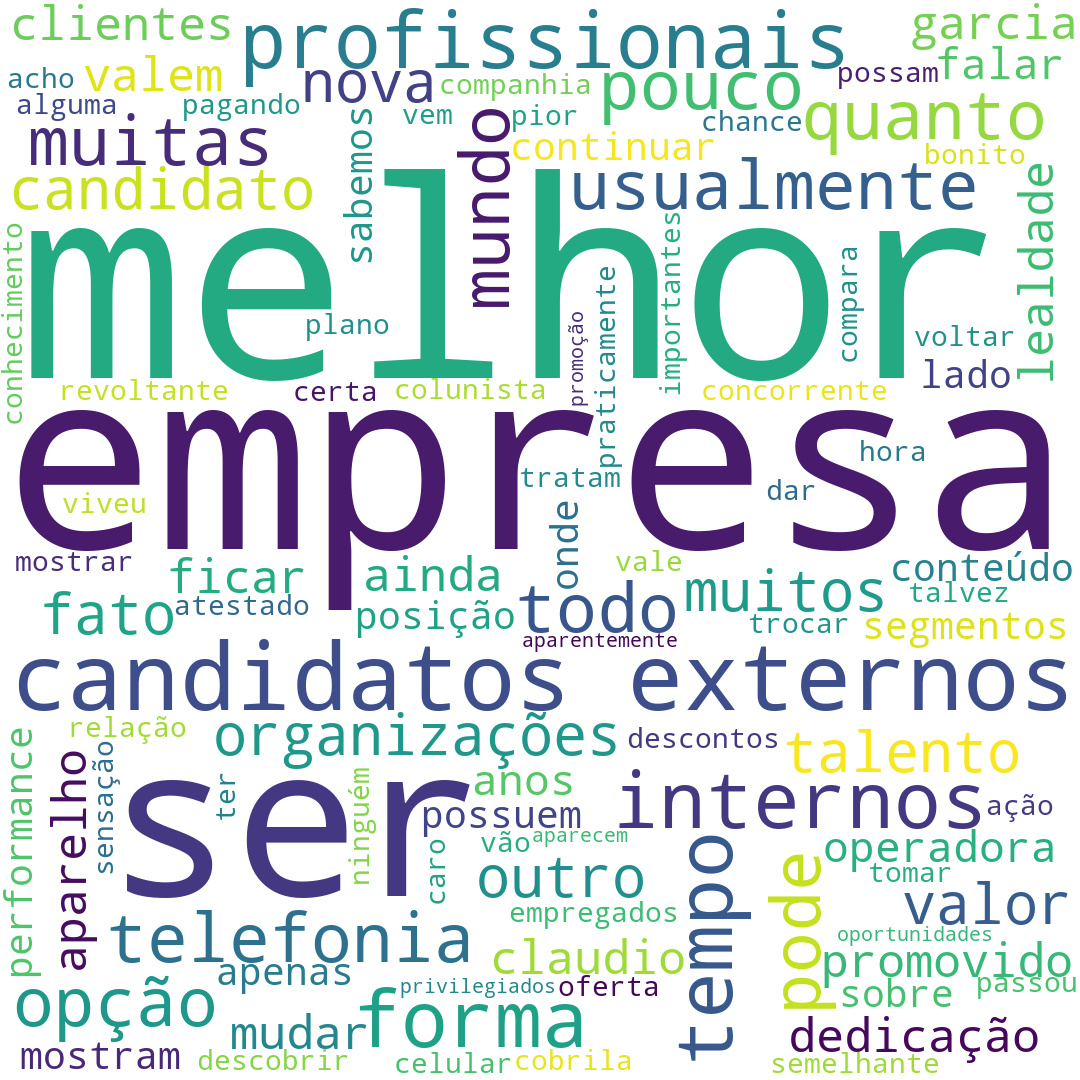

## Analisando sentimentos na reportagem